In [3]:
cd /Users/elephant/work

/Users/elephant/work


In [5]:
cd LearnBayes/

/Users/elephant/work/LearnBayes


DESCRIPTION       R/                data/             man/
LearnBayes.Rproj  README.md         demo/             vignettes/
NAMESPACE         chm/              inst/


In [235]:
import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
studentdata =pd.read_csv('data/studentdata.txt',sep='\t')

In [11]:
studentdata.head()

,Student,Height,Gender,Shoes,Number,Dvds,ToSleep,WakeUp,Haircut,Job,Drink
0,1,67.0,female,10.0,5.0,10.0,-2.5,5.5,60.0,30.0,water
1,2,64.0,female,20.0,7.0,5.0,1.5,8.0,0.0,20.0,pop
2,3,61.0,female,12.0,2.0,6.0,-1.5,7.5,48.0,0.0,milk
3,4,61.0,female,3.0,6.0,40.0,2.0,8.5,10.0,0.0,water
4,5,70.0,male,4.0,5.0,6.0,0.0,9.0,15.0,17.5,pop


In [16]:
studentdata.groupby('Drink')['Student'].count()

Drink
milk     113
pop      178
water    355
Name: Student, dtype: int64

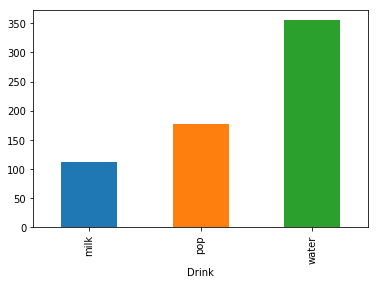

In [18]:
studentdata.groupby('Drink')['Student'].count().plot.bar()

In [21]:
studentdata['HoursSleep'] = studentdata['WakeUp'] - studentdata['ToSleep'] 

In [23]:
studentdata['HoursSleep'].describe()

count    653.000000
mean       7.385191
std        1.511810
min        2.500000
25%        6.500000
50%        7.500000
75%        8.500000
max       12.500000
Name: HoursSleep, dtype: float64

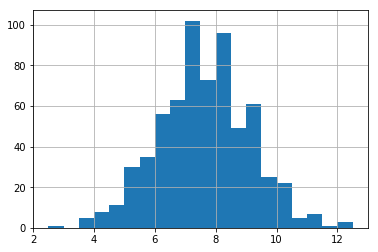

In [27]:
studentdata['HoursSleep'].hist(bins=20)

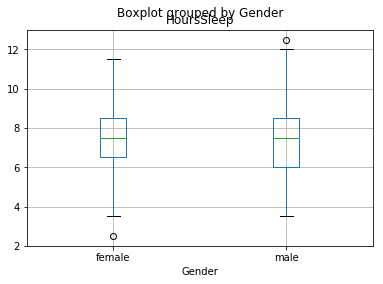

In [30]:
studentdata.boxplot(column=['HoursSleep'],by='Gender')

In [31]:
import statsmodels.api as sm

In [37]:
studentdata['HoursSleep'].isna().value_counts()

False    653
True       4
Name: HoursSleep, dtype: int64

In [40]:
Y = studentdata[~studentdata['HoursSleep'].isna()]['HoursSleep']
X = studentdata[~studentdata['HoursSleep'].isna()]['ToSleep'] 
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()
results.params

const      7.962764
ToSleep   -0.575282
dtype: float64

In [45]:
X

,const,ToSleep
0,1.0,-2.5
1,1.0,1.5
2,1.0,-1.5
3,1.0,2.0
4,1.0,0.0
5,1.0,1.0
6,1.0,1.5
7,1.0,0.5
8,1.0,-0.5
9,1.0,2.5


In [54]:
slope, intercept

(-0.5752824223460709, 7.96276440442586)

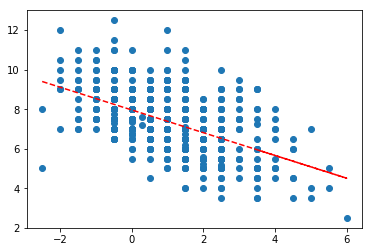

In [55]:
plt.plot(X['ToSleep'],Y,"o")
slope,intercept = np.polyfit(X['ToSleep'], Y, 1)
pylab.plot(X['ToSleep'],X['ToSleep']*slope + intercept,"r--")

In [282]:
    
x=t.rvs(size=(N,n),df=4)
y=t.rvs(size=(N,n),df=4)

In [339]:
N=10000
m=10
n=10
alpha=0.1
mn = m+n-2


def tstatistic(g,h):
    sx = np.std(g,axis=1,ddof=1)
    sy = np.std(h,axis=1,ddof=1)
    sp = np.sqrt(((n-1)*pow(sx,2)+(m-1)*pow(sy,2))/mn)
    tst = (mean(g,axis=1) -mean(h,axis=1))/(sp*sqrt(1/m+1/n))
    return tst


def frac_rejects(mu=10,sigx=2,sigy=10):
    x = nr.normal(mu, sigx, size=(N,n))
    y= stats.expon.rvs(scale=10,size=(N,n))
#     y = nr.normal(mu, sigy, size=(N,m))
#     x=t.rvs(size=(N,n),df=4)
#     y=t.rvs(size=(N,n),df=4)
    tn = tstatistic(x,y)
    n_reject = sum(abs(tn) > t.ppf(1-alpha/2,mn))/N
    return n_reject,tn
        

In [336]:
whyn()


(0.156, array([ 2.33259703,  0.03312294,  0.25909293, ...,  6.70391719,
         1.12120511, -0.60108081]))

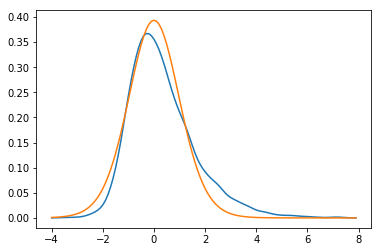

In [337]:
nn,nt = whyn()
density = stats.kde.gaussian_kde(nt)
x = numpy.arange(-4., 8, .1)
plt.plot(x, density(x))
plt.plot(x, t.pdf(x,df=18))
plt.show()